# Sandbox
Notebook to test code before real implementation

In [1]:
################ ONLY PYTHON 2 #########################
from __future__ import division
from __future__ import print_function
from operator import itemgetter
from itertools import combinations, chain, product
import argparse
import time
import os
import tensorflow as tf
import numpy as np
import networkx as nx
import scipy.sparse as sp
from sklearn import metrics
import pandas as pd
import psutil
import pickle
from decagon.deep.optimizer import DecagonOptimizer
from decagon.deep.model import DecagonModel
from decagon.deep.minibatch import EdgeMinibatchIterator
from decagon.utility import rank_metrics, preprocessing

In [ ]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
import time
import os
import psutil
import pickle
from pybdm import BDM
from pybdm.utils import decompose_dataset
from pybdm.partitions import PartitionIgnore
from joblib import Parallel, delayed
from joblib import parallel_backend
from data.algorithms import PerturbationExperiment, NodePerturbationExperiment
import math
import datetime as dt
from itertools import product

## Testing fixed unigram candidate sampler found in optimization

In [ ]:
sess = tf.Session()
a = [7,0,20,8,33,9]
A = tf.reshape(tf.constant(a,dtype=tf.int64),[6,1])
sampled_ids, true_expected_count, sampled_expected_count = tf.nn.fixed_unigram_candidate_sampler(
   true_classes = A,
   num_true = 1,
   num_sampled = 20,
   unique = False,
   range_max = np.shape(a)[0],
   unigrams = [ 10, 10, 10, 10, 50, 10 ]
)
sample = tf.gather( A, sampled_ids )
print(sess.run( true_expected_count ))
print(sess.run( sampled_ids ))
print(sess.run( sampled_expected_count ))
print(sess.run( sample ))

In [2]:
in_file = 'data/data_structures/DECAGON/DECAGON_real_affinities_genes_16814_drugs_276_se_7'
with open(in_file, 'rb') as f:
    DS = pickle.load(f)
    for key in DS.keys():
        globals()[key]=DS[key]
        print(key,"Imported successfully")

edge2name Imported successfully
se_mono_name2idx Imported successfully
gene2idx Imported successfully
nonzero_feat Imported successfully
edge_type2dim Imported successfully
adj_mats_orig Imported successfully
edge_type2decoder Imported successfully
se_combo_name2idx Imported successfully
drug2idx Imported successfully
degrees Imported successfully
edge_types Imported successfully
num_edge_types Imported successfully
num_feat Imported successfully
feat Imported successfully


In [9]:
adj_mats_orig[1,0][0].todense().sum()

17151

In [6]:
val_metrics[0,:,:]

array([[0.89498749, 0.9307078 , 0.90229473],
       [0.98858382, 0.98770252, 0.97454285],
       [0.89350087, 0.88853503, 0.81277744],
       ...,
       [0.64791111, 0.58248612, 0.53333333],
       [0.5614612 , 0.49023296, 0.45973154],
       [0.67573696, 0.5640822 , 0.53061224]])

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/juan/anaconda3/envs/py2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


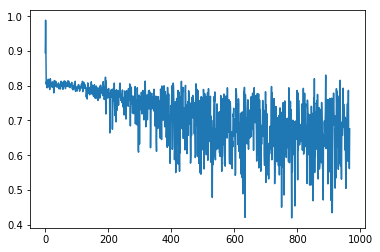

In [8]:
plot(val_metrics[0,:,0])

In [ ]:
DF = pd.read_csv('../Thesis_datasets/LINCS/LINCS_Gene_Experssion_signatures_CD.csv')

In [ ]:
# Genes
DF.columns

In [ ]:
# Genes
len(DF.columns)

In [ ]:
len(DF.index)

In [ ]:
DF.head(5)

# iteration experiment

In [44]:
iters = 100000
n_batch = 10
n_se = 7
PPI = 0
DTI = 0
TDI = 0
DDI = n_se*[0]
freebatch = list(range(n_se))
i=0
while i < iters:
    if i%4==0:
        PPI+=1
    elif i%4==1:
        DTI+=1
    elif i%4==2:
        TDI+=1
    else:
        if len(freebatch) > 0:
            j = np.random.choice(freebatch)
            if DDI[j]%(n_batch-1)==0:
                DDI[j]+=1
                freebatch.remove(j)
                continue
            else:
                DDI[j]+=1
        else:
            PPI+=1
            freebatch = list(range(n_se))
            #print(len(freebatch))
    i+=1
data = np.array([PPI]+[DTI]+[TDI]+DDI)

<BarContainer object of 10 artists>

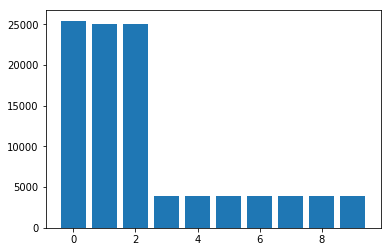

In [45]:
bar(list(range(len(data))),data)

In [46]:
data

array([25439, 25000, 25000,  3947,  3952,  3949,  3947,  3946,  3945,
        3949])